In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

C:\Users\david\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('data/ml_insurance_challenge.csv')
labels = pd.read_csv('data/insurance_taxonomy - insurance_taxonomy.csv')

In [3]:
print(data.shape)
print(labels.shape)

(9494, 5)
(220, 1)


In [4]:
data.head()

,description,business_tags,sector,category,niche
0,Welchcivils is a civil engineering and constru...,"['Construction Services', 'Multi-utilities', '...",Services,Civil Engineering Services,Other Heavy and Civil Engineering Construction
1,"Kyoto Vegetable Specialists Uekamo, also known...","['Wholesale', 'Dual-task Movement Products', '...",Manufacturing,Fruit & Vegetable - Markets & Stores,"Frozen Fruit, Juice, and Vegetable Manufacturing"
2,Loidholdhof Integrative Hofgemeinschaft is a c...,"['Living Forms', 'Farm Cafe', 'Fresh Coffee', ...",Manufacturing,Farms & Agriculture Production,All Other Miscellaneous Crop Farming
3,PATAGONIA Chapa Y Pintura is an auto body shop...,"['Automotive Body Repair Services', 'Interior ...",Services,Auto Body Shops,"Automotive Body, Paint, and Interior Repair an..."
4,Stanica WODNA PTTK Swornegacie is a cultural e...,"['Cultural Activities', 'Accommodation Service...",Services,Boat Tours & Cruises,"Scenic and Sightseeing Transportation, Water"


In [8]:
# primul rand
for index, column in enumerate(data.iloc[2000]):
    print(f"{data.columns[index].upper()}:\n {column}")


DESCRIPTION:
 Alberi di Natale in Legno is a company that specializes in selling unique wooden Christmas trees and other wooden sculptures. Each tree is an artwork created by Luca Tassone and Mauro Corona, and is a work of art that can decorate homes throughout the year. The company offers a variety of Christmas trees, including those with different designs such as Marianna, Marta, Vera, Nicola, Marco, Betty, Marilena, Franco, Angela, Edward, Annalisa, Paolo, and Maria Luisa. The trees are made from wood from the Dolomites, which continues to maintain its life and beauty even after being transformed into a unique sculpture by Lucan. In addition to sculpture, Luca is also a painter and videomaker who has gained international recognition for his short films.
BUSINESS_TAGS:
 ['Artistic Sculptures', 'Wooden Cactus Sculptors', 'Artistic Creations', 'Nature-inspired Artwork', 'Terracotta Sculpting', 'Art Sales', 'Christmas Tree Sculpture']
SECTOR:
 Manufacturing
CATEGORY:
 Tree Farms
NICHE:


sector
Manufacturing    4005
Services         3556
Wholesale         779
Retail            571
Government        255
Education         161
Non Profit        140
Name: count, dtype: int64


<Axes: xlabel='sector'>

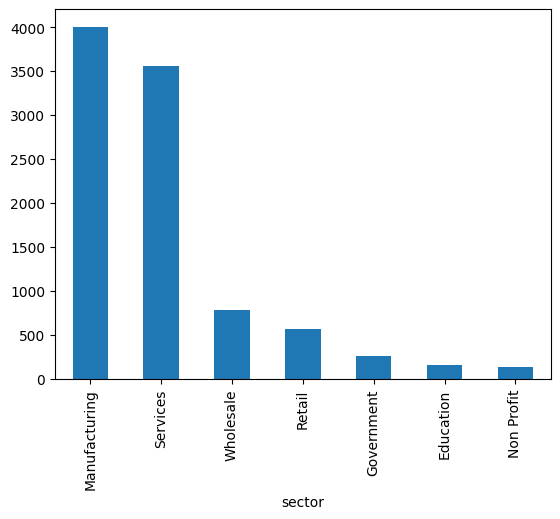

In [7]:
# vedem de cate tipuri sunt sectoarele
print(data['sector'].value_counts())
# histogram cu cele 7 sectoare
data['sector'].value_counts().plot(kind='bar')

In [35]:
data['category'].value_counts()

category
Farms & Agriculture Production                      237
Executive, Legislative & Government Institutions    172
Chemicals                                           150
Industrial Machinery & Supplies                     126
Livestock & Animal Raising                          121
                                                   ... 
Aquarium                                              1
Employment Attorneys                                  1
Electronics Repair & Maintenance                      1
Preschools & Kindergartens                            1
Transportation & Shipping Associations                1
Name: count, Length: 450, dtype: int64

<Axes: xlabel='category'>

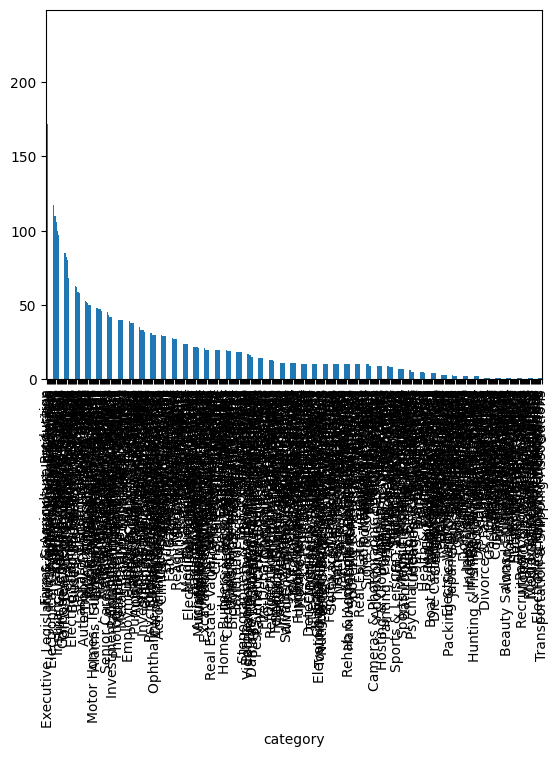

In [36]:
data['category'].value_counts().plot(kind='bar')

In [37]:
data['niche'].value_counts()

niche
Apiculture                                                     10
Other Heavy and Civil Engineering Construction                 10
Frozen Fruit, Juice, and Vegetable Manufacturing               10
All Other Miscellaneous Crop Farming                           10
Automotive Body, Paint, and Interior Repair and Maintenance    10
                                                               ..
Pipeline Transportation of Natural Gas                          2
Underground Coal Mining                                         2
Dimension Stone Mining and Quarrying                            2
Scenic and Sightseeing Transportation, Other                    1
Steam and Air-Conditioning Supply                               1
Name: count, Length: 957, dtype: int64

### 7 sectoare, 450 de categorii si 957 de nise

In [46]:
# verificam daca o categorie apartine unui singur sector
category_sector = data[['category', 'sector']].drop_duplicates()
print(category_sector.shape)
print(data['category'].nunique())

(582, 2)
450


In [47]:
# verificam daca o categorie apartine unui singur sector
category_sector = data[['niche', 'sector']].drop_duplicates()
print(category_sector.shape)
print(data['niche'].nunique())

(973, 2)
957


In [48]:
# verificam daca o categorie apartine unui singur sector
category_sector = data[['niche', 'category']].drop_duplicates()
print(category_sector.shape)
print(data['niche'].nunique())

(1455, 2)
957


### O nisa poate apartine mai multor categorii, o categorie poate apartine mai multor sectoare

In [49]:
data.columns

Index(['description', 'business_tags', 'sector', 'category', 'niche'], dtype='object')